# Linear Regression Analysis

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression

In [4]:
col_names = ['Code','Patella_PN','Femur_PN','Tibia_PN','Patella_Car_PN','Femur_Car_PN','Tibia_M_Car_PN','Tibia_L_Car_PN','Patella_volume','Femur_volume','Tibia_volume','Patella_Car_volume','Femur_Car_volume','Tibia_M_Car_volume','Tibia_L_Car_volume','Patella_bounds_x','Femur_bounds_x','Tibia_bounds_x','Patella_Car_bounds_x','Femur_Car_bounds_x','Tibia_M_Car_bounds_x','Tibia_L_Car_bounds_x','Patella_bounds_y','Femur_bounds_y','Tibia_bounds_y','Patella_Car_bounds_y','Femur_Car_bounds_y','Tibia_M_Car_bounds_y','Tibia_L_Car_bounds_y','Patella_bounds_z','Femur_bounds_z','Tibia_bounds_z','Patella_Car_bounds_z','Femur_Car_bounds_z','Tibia_M_Car_bounds_z','Tibia_L_Car_bounds_z','Max_dist_femur_tibia_lat_car','Min_dist_femur_tibia_lat_car','Mean_dist_femur_tibia_lat_car','Max_dist_femur_tibia_med_car','Min_dist_femur_tibia_med_car','Mean_dist_femur_tibia_med_car','Max_tib_lat_contact_pressure','Max_tib_med_contact_pressure']

file_path = "C:\\Users\\steph\\Documents\\GitHub\\f22-ai-cbl\\data\\processed\\set_2\\out.csv"
data = pd.read_csv(file_path, header=None, names=col_names, skiprows=[0])
df = pd.DataFrame(data, columns = col_names)

In [5]:
print(df.shape)
df.head()

(28, 44)


,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car,Max_tib_lat_contact_pressure,Max_tib_med_contact_pressure
0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,229006.314467,...,51.821435,38.669460,17.745715,2.039169,6.118655,12.363764,1.604390,4.737838,20.304403,21.124319
1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,246641.112279,...,49.585413,39.525092,17.898652,1.921611,5.881292,11.342142,1.238408,4.577601,16.648224,24.434072
2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,141352.763773,...,42.175751,34.364839,17.383859,1.526717,5.834900,11.786139,1.642169,4.761267,24.156282,32.353172
3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,149215.886238,...,42.911019,33.854403,15.747611,1.651787,5.670845,9.728744,1.010164,4.052701,26.788031,41.688950
4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,248976.459037,...,45.878323,53.532299,13.779237,1.205597,4.272830,20.666032,2.178122,6.670601,24.228903,16.497473


## Splitting data into train/test sets

In [6]:
## Feature columns for x values
feature_cols = ['Patella_PN','Femur_PN','Tibia_PN','Patella_Car_PN','Femur_Car_PN','Tibia_M_Car_PN','Tibia_L_Car_PN','Patella_volume','Femur_volume','Tibia_volume','Patella_Car_volume','Femur_Car_volume','Tibia_M_Car_volume','Tibia_L_Car_volume','Patella_bounds_x','Femur_bounds_x','Tibia_bounds_x','Patella_Car_bounds_x','Femur_Car_bounds_x','Tibia_M_Car_bounds_x','Tibia_L_Car_bounds_x','Patella_bounds_y','Femur_bounds_y','Tibia_bounds_y','Patella_Car_bounds_y','Femur_Car_bounds_y','Tibia_M_Car_bounds_y','Tibia_L_Car_bounds_y','Patella_bounds_z','Femur_bounds_z','Tibia_bounds_z','Patella_Car_bounds_z','Femur_Car_bounds_z','Tibia_M_Car_bounds_z','Tibia_L_Car_bounds_z','Max_dist_femur_tibia_lat_car','Min_dist_femur_tibia_lat_car','Mean_dist_femur_tibia_lat_car','Max_dist_femur_tibia_med_car','Min_dist_femur_tibia_med_car','Mean_dist_femur_tibia_med_car']
## Result columns for y values
y_cols = ['Max_tib_lat_contact_pressure', 'Max_tib_lat_contact_pressure']

X = data[feature_cols]
y = data[y_cols]



## Folding train-test split lines 11 - 12
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

## 80/20 test-train split lines 19, 24-26
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 90/10 test-train split lines 22, 24-26
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#model = LinearRegression()
#model.fit(X_train, y_train)
#print(rgr.score(X_test, y_test))

Accuracy: -12.47%


### Evaluations

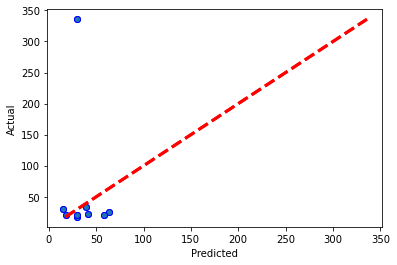

In [9]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [10]:
from sklearn import metrics

# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49.5872219017597
MSE is 10848.146074311284
R2 score is -0.12473858715461028
